In [13]:
import numpy as np 
import matplotlib.pyplot as plt
from qutip import * 

# SQUID Hamiltonian 

$H = E_c n_c^2 + 2E_J \cos(\phi_{ext}) \cos(\phi)$

which can be approximated as 
$H = \omega_c(\Phi) c^\dagger c + $

In [14]:
phi0 = 1

class SQUID():
    def __init__(self, EJ, EC):
        self.EJ = EJ
        self.EC = EC
        # self.EL = EL
        # self.phi0 = phi0

    def get_anharmonicity(self):
        return -1 * self.EC

    def get_frequency(self, phi_ext):
        return np.sqrt(8 * self.EJ * self.EC * np.abs(np.cos(phi_ext)))
    


class HamiltonianSolver:
    def __init__(self, hamiltonian):
        if not isinstance(hamiltonian, Qobj):
            raise ValueError("Hamiltonian must be a Qobj instance from QuTiP")
        self.hamiltonian = hamiltonian

    def diagonalize(self):
        eigenvalues, eigenstates = self.hamiltonian.eigenstates()
        return eigenvalues, eigenstates
    
    def sweep_parameter(self, parameter, values):
        eigenvalues = []
        for value in values:
            H = self.hamiltonian.subs({parameter: value})
            eigenvalues.append(H.eigenenergies())
        return eigenvalues



## SQUID dispersion

Text(0, 0.5, '$\\omega$')

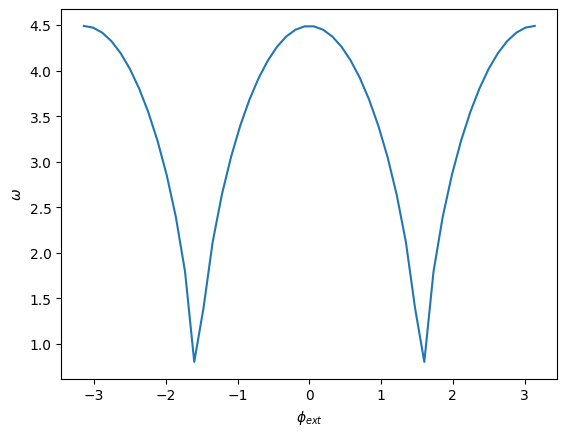

In [152]:
phi_pts = np.linspace(-0.5,0.5) * 2 * np.pi
squid = SQUID(EJ = 42, EC =0.06)
omega_list = squid.get_frequency(phi_pts)
plt.plot(phi_pts, omega_list)
plt.xlabel(r'$\phi_{ext}$')
plt.ylabel(r'$\omega$')

## Coupling an oscillator to it 

In [153]:
# Example usage:
# Define parameters
N = 3 # number of Fock states
# omega_coup = omega_list
phi_pts = np.linspace(-0.5,0.5, 100) * 2 * np.pi
squid = SQUID(EJ = 42, EC = 0.06)
omega_list = squid.get_frequency(phi_pts) 
omega2 = 4.9  # frequency of the second oscillator
g = 0.3  # coupling strength



# Creation and annihilation operators
a1 = tensor(destroy(N), qeye(N))
a2 = tensor( qeye(N), destroy(N))


# Hamiltonian
def coupled_oscillator_hamiltonian(omega1, omega2, g, a1, a2):

    return omega1 * a1.dag() * a1 + omega2 * a2.dag() * a2 + g * (a1.dag() + a1) * (a2.dag() + a2)



# Create an instance of HamiltonianSolver
eigenvalues_sweep = [] # dims: omega1_pts x eigenvalues


for omega1 in omega_list:
# omega1 = 1
    # print('omega1:', omega1)
    H = coupled_oscillator_hamiltonian(omega1, omega2, g, a1, a2)
    solver = HamiltonianSolver(H)
    eigenvalues, eigenstates = solver.diagonalize()
    eigenvalues_sweep.append(eigenvalues)


# solver = HamiltonianSolver(H)

# plot eigenvalues
# plt.plot(omega_list, eigenvalues)

In [154]:
# print("Eigenvalues:")
# print(eigenvalues)
# print("\nEigenstates:")
# for i, state in enumerate(eigenstates):
#     print(f"Eigenstate {i}:")
#     print(state)

Text(0, 0.5, '$\\omega$')

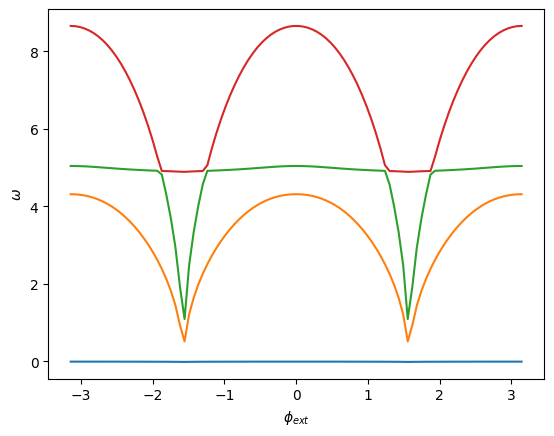

In [159]:
eigvals_sweep = np.array(eigenvalues_sweep).T

# sorted eigenvalues

num_cutoff = 4
for i in range(num_cutoff):

    plt.plot(phi_pts, eigvals_sweep[i],  label = f"n = {i}")
plt.xlabel(r'$\phi_{ext}$')
plt.ylabel(r'$\omega$')

Text(0.5, 1.0, 'Difference from omega = 5')

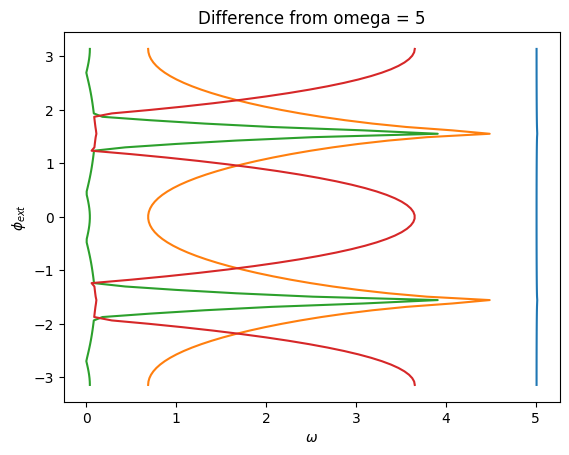

In [161]:
eigvals_sweep = np.array(eigenvalues_sweep).T

# sorted eigenvalues

num_cutoff = 4
for i in range(num_cutoff):

    #plt.plot(phi_pts, np.abs(eigvals_sweep[i] -5),  label = f"n = {i}")
    plt.plot(np.abs(eigvals_sweep[i] -5), phi_pts,  label = f"n = {i}")
plt.ylabel(r'$\phi_{ext}$')
plt.xlabel(r'$\omega$')
plt.title('Difference from omega = 5')

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

class HamiltonianSolver:
    def __init__(self, hamiltonian):
        if not isinstance(hamiltonian, Qobj):
            raise ValueError("Hamiltonian must be a Qobj instance from QuTiP")
        self.hamiltonian = hamiltonian

    def diagonalize(self):
        eigenvalues, eigenstates = self.hamiltonian.eigenstates()
        return eigenvalues, eigenstates

# Example usage:
# Define parameters
N = 3  # number of Fock states
num_modes = 5  # number of modes coupled to the frequency-tunable mode
phi_pts = np.linspace(0, 0.5, 100) * 2 * np.pi
squid = SQUID(EJ=72, EC=0.06)
omega_list = squid.get_frequency(phi_pts)
omega2 = 4.9  # frequency of the second oscillator
g = 0.1  # coupling strength
omega_fixed_list = [4.9, 5.05, 5.2, 5.35, 5.5]  # frequencies of the fixed modes
mode_labels = ['Man1', 'Man2', 'S1', 'S2', 'S3']

# Creation and annihilation operators for the tunable mode
a_tunable = tensor(destroy(N), *[qeye(N) for _ in range(num_modes)])

# Creation and annihilation operators for the fixed modes
a_modes = [tensor(*[qeye(N) if i != j else destroy(N) for i in range(num_modes + 1)]) for j in range(1, num_modes + 1)]

# Hamiltonian
def coupled_oscillator_hamiltonian(omega_tunable, omega_fixed_list, g, a_tunable, a_modes):
    H = omega_tunable * a_tunable.dag() * a_tunable
    for i, a_mode in enumerate(a_modes):
        H += omega_fixed_list[i] * a_mode.dag() * a_mode + g * (a_tunable.dag() + a_tunable) * (a_mode.dag() + a_mode)
    return H

# Create an instance of HamiltonianSolver
eigenvalues_sweep = []  # dims: omega1_pts x eigenvalues

for omega_tunable in omega_list:
    H = coupled_oscillator_hamiltonian(omega_tunable, omega_fixed_list, g, a_tunable, a_modes)
    solver = HamiltonianSolver(H)
    eigenvalues, eigenstates = solver.diagonalize()
    eigenvalues_sweep.append(eigenvalues)


In [205]:
omega_list

array([5.87877538, 5.87729534, 5.87285446, 5.86545051, 5.8550797 ,
       5.84173673, 5.82541464, 5.80610484, 5.78379695, 5.75847872,
       5.73013593, 5.69875223, 5.66430894, 5.6267849 , 5.58615621,
       5.54239597, 5.495474  , 5.44535644, 5.39200539, 5.3353784 ,
       5.27542795, 5.21210082, 5.1453373 , 5.07507038, 5.00122469,
       4.92371528, 4.84244621, 4.75730879, 4.66817954, 4.57491757,
       4.47736159, 4.37532598, 4.26859604, 4.15692194, 4.04001093,
       3.91751734, 3.78902928, 3.65405084, 3.51197776, 3.36206318,
       3.20336825, 3.03468862, 2.85444019, 2.66047335, 2.44975122,
       2.21774679, 1.95718374, 1.65495574, 1.2823537 , 0.74049153,
       0.74049153, 1.2823537 , 1.65495574, 1.95718374, 2.21774679,
       2.44975122, 2.66047335, 2.85444019, 3.03468862, 3.20336825,
       3.36206318, 3.51197776, 3.65405084, 3.78902928, 3.91751734,
       4.04001093, 4.15692194, 4.26859604, 4.37532598, 4.47736159,
       4.57491757, 4.66817954, 4.75730879, 4.84244621, 4.92371

Text(0, 0.5, '$\\omega$')

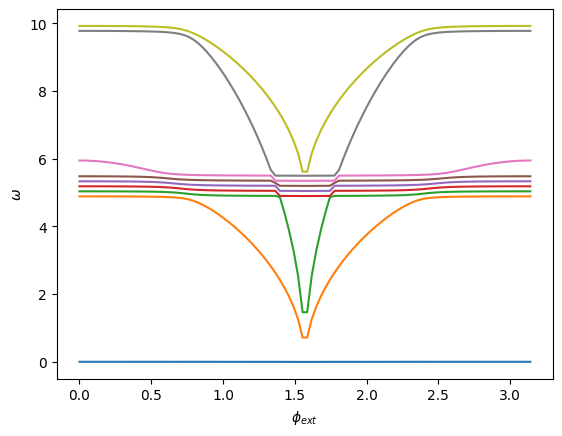

In [203]:
eigvals_sweep = np.array(eigenvalues_sweep).T

# sorted eigenvalues

num_cutoff = 9
for i in range(num_cutoff):

    plt.plot(phi_pts, eigvals_sweep[i],  label = f"n = {i}")
plt.xlabel(r'$\phi_{ext}$')
plt.ylabel(r'$\omega$')

Text(0.5, 1.0, 'Difference from omega = 4.9')

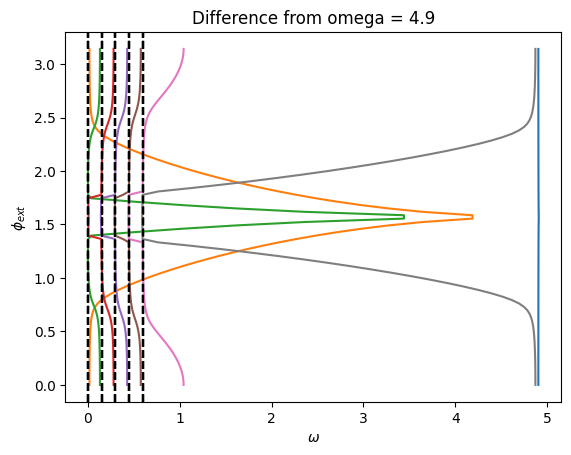

In [204]:
eigvals_sweep = np.array(eigenvalues_sweep).T

# sorted eigenvalues

num_cutoff = 8
for i in range(num_cutoff):

    #plt.plot(phi_pts, np.abs(eigvals_sweep[i] -5),  label = f"n = {i}")
    plt.plot(np.abs(eigvals_sweep[i] -4.9), phi_pts,  label = f"n = {i}")
    # plot mode frequencies
    for j in range(num_modes):
        plt.axvline(x=omega_fixed_list[j] - 4.9, color='black', linestyle='--')

plt.ylabel(r'$\phi_{ext}$')
plt.xlabel(r'$\omega$')
plt.title('Difference from omega = 4.9')

### Trying to simulate DC Dlux scan

Text(0, 0.5, '$\\omega$')

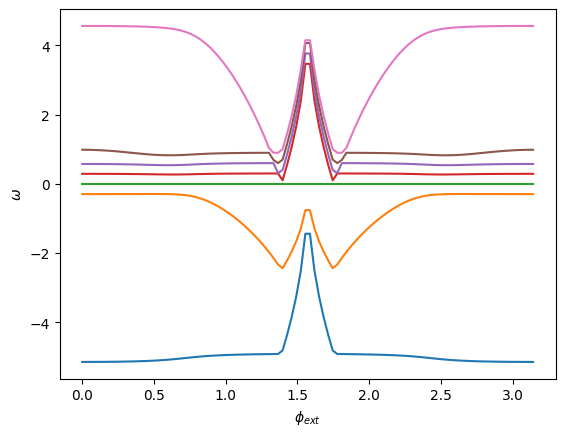

In [190]:
eigvals_sweep = np.array(eigenvalues_sweep).T

# sorted eigenvalues

num_cutoff = 7
for i in range(num_cutoff):

    plt.plot(phi_pts, eigvals_sweep[i] - eigvals_sweep[2],  label = f"n = {i}")
plt.xlabel(r'$\phi_{ext}$')
plt.ylabel(r'$\omega$')

Text(0.5, 1.0, 'Difference from omega = 4.9')

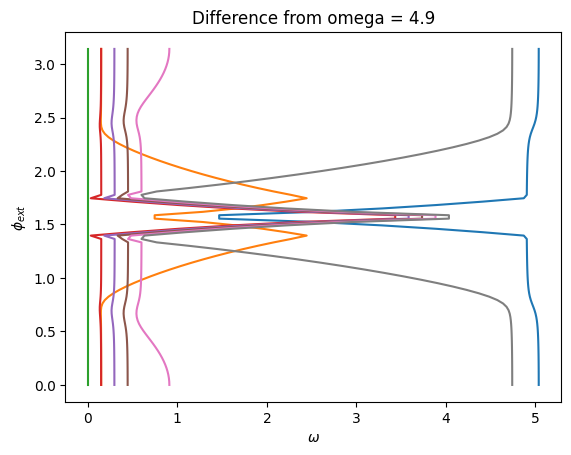

In [201]:
eigvals_sweep = np.array(eigenvalues_sweep).T

# sorted eigenvalues

num_cutoff = 8
for i in range(num_cutoff):

    #plt.plot(phi_pts, np.abs(eigvals_sweep[i] -5),  label = f"n = {i}")
    plt.plot(np.abs(eigvals_sweep[i] -eigvals_sweep[2]), phi_pts,  label = f"n = {i}")
plt.ylabel(r'$\phi_{ext}$')
plt.xlabel(r'$\omega$')
plt.title('Difference from omega = 4.9')